## Lineare Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
import geopandas as gpd
import pandas as pd

# Pfad zur GeoJSON-Datei angeben
file_path = "../../data/processed_data/simra_osm_all.geojson"

# GeoJSON-Datei einlesen
gdf = gpd.read_file(file_path)

gdf.head()

,id,type,score,incidents,rides,index_right,maxspeed,asphalt,concrete,paving_stone,...,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track,geometry
0,[100049].0,Street,0.0,0,138,57832.0,50,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0,"POLYGON ((13.45412 52.54035, 13.45320 52.53977..."
1,[100069498].0,Junction,0.0,0,200,123443.0,30,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,"POLYGON ((13.52273 52.50704, 13.52248 52.50690..."
2,"[100078509, 288268004, 3888645535].0",Junction,0.0,0,54,75145.0,50,0.846154,0.0,0.0,...,0.0,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0,"POLYGON ((13.47754 52.51457, 13.47782 52.51438..."
3,[100094].0,Street,0.0,0,98,6529.0,30,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,"POLYGON ((13.46855 52.61490, 13.46841 52.61475..."
4,[1000].0,Street,0.0,0,130,156528.0,50,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0,"POLYGON ((13.35533 52.51693, 13.35655 52.51683..."


In [2]:
df = gdf.drop(columns=['id', 'index_right', 'geometry', 'markers', 'highway'])

df.head()

,type,score,incidents,rides,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,...,footway,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track
0,Street,0.0,0,138,50,0.000000,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0
1,Junction,0.0,0,200,30,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
2,Junction,0.0,0,54,50,0.846154,0.0,0.0,0.0,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0
3,Street,0.0,0,98,30,0.500000,0.0,0.0,0.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
4,Street,0.0,0,130,50,1.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0


In [5]:
df = pd.get_dummies(df, columns=['type'])

df.head()

,score,incidents,rides,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,...,living_street,path,primary,residential,secondary,service,tertiary,track,type_Junction,type_Street
0,0.0,0,138,50,0.000000,1.0,0.0,0.0,0.000000,0.250000,...,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0,False,True
1,0.0,0,200,30,1.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,True,False
2,0.0,0,54,50,0.846154,0.0,0.0,0.0,0.153846,0.384615,...,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0,True,False
3,0.0,0,98,30,0.500000,0.0,0.0,0.0,0.500000,0.000000,...,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,False,True
4,0.0,0,130,50,1.000000,0.0,0.0,0.0,0.000000,0.333333,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0,False,True


#### Zielvariable festlegen

In [3]:
# Zielvariable 
y = df['score']

# Alle anderen Spalten als Features verwenden 
X = df.drop(columns=['score'])

#### Aufteilen in Test und Trainingsdaten

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

#### Erstellen und Trainieren des Modells

In [8]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Vorhersagen mit dem Testdatensatz

In [9]:
y_pred = model.predict(X_test)

#### Ausgabe der Koeffizienten und des Intercepts (Achsenabschnitts)

In [10]:
print("Koeffizienten:", model.coef_)
print("Achsenabschnitt (Intercept):", model.intercept_)

Koeffizienten: [ 3.55859140e-03 -2.36170939e-05 -8.58661511e-08 -2.20974929e-03
 -4.96720855e-03  7.70726847e-03 -4.50158106e-03  3.97127044e-03
 -9.39656785e-04 -2.73721854e-03 -5.22517714e-03  4.14478796e-04
 -3.48145516e-03  2.99925729e-03  3.34935017e-03  4.94155546e-03
  4.29687958e-03  5.81864941e-03 -9.43666309e-03 -1.58225656e-03
  1.58225656e-03]
Achsenabschnitt (Intercept): 0.008519155929085262


#### Bewertung des Modells

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.001854647105581067
R^2 Score: 0.16512683637916692


## Interpretation:

#### **Koeffizienten (model.coef_):** 
Diese zeigen die Gewichtung der jeweiligen Features.
  Jeder Koeffizient zeigt an, wie stark sich die Zielvariable (y) ändert, wenn sich der entsprechende Feature-Wert (X) um eine Einheit verändert, während alle anderen Features konstant gehalten werden.
  - **Positive Koeffizienten:** Ein positiver Koeffizient zeigt, dass ein Anstieg des Features um eine Einheit zu einem Anstieg der Zielvariable führt.
  - **Negative Koeffizienten:** Ein negativer Koeffizient zeigt, dass ein Anstieg des Features um eine Einheit zu einem Rückgang der Zielvariable führt.
 
> Die Koeffizienten helfen zu verstehen, welche Features einen Einfluss auf die Zielvariable haben und in welche Richtung dieser Einfluss geht (positiv oder negativ). Je größer der absolute Wert eines Koeffizienten, desto stärker ist der Einfluss des entsprechenden Features auf die Zielvariable.
 
#### **Achsenabschnitt (Intercept)**
Der Achsenabschnitt (model.intercept_) ist der Wert der Zielvariable, wenn alle Features gleich null sind. Im Modell beträgt der Achsenabschnitt etwa 0.0085.
Dies bedeutet, dass, wenn alle Werte der Features auf 0 gesetzt werden, der Wert der Zielvariable auf 0.0085 geschätzt wird.

> Der Achsenabschnitt gibt den Basiswert der Zielvariable an, wenn alle Features keinen Einfluss haben (d.h., ihre Werte sind null).
    

**Es ist auch nützlich, die Koeffizienten im Vergleich zur Größe und Einheit der Features zu betrachten.**
  
#### **Intercept (model.intercept_):
** Der Schnittpunkt der Regressionslinie mit der y-Achse.

  
#### **Mean Squared Error (MSE):** 
Zeigt den durchschnittlichen Fehler des Modells.

**Wert: 0.001854647105581067**

Ein niedrigerer MSE zeigt an, dass die Vorhersagen des Modells näher an den tatsächlichen Werten liegen. In Modell ist der MSE relativ klein, was darauf hinweist, dass die Vorhersagen des Modells nicht sehr weit von den tatsächlichen Werten entfernt sind.

#### **R²-Score:** 
Zeigt an, wie gut das Modell die Daten erklärt (Wert zwischen 0 und 1, wobei 1 eine perfekte Erklärung bedeutet).

**Wert: 0.16512683637916692**

Ein R²-Score von etwa 0.165 bedeutet, dass das Modell etwa 16.5% der Variation in den Zielwerten erklärt. Das Modell erklärt also nur einen kleinen Teil der Gesamtvariation. In vielen Fällen wird ein niedriger R²-Score darauf hinweisen, dass das Modell nicht sehr gut zur Erklärung der Zielvariable beiträgt oder dass möglicherweise weitere oder andere Features erforderlich sind, um bessere Vorhersagen zu ermöglichen.

#### Zusammenfassung

**MSE:** Dein MSE-Wert ist relativ niedrig, was darauf hinweist, dass die Fehler im Durchschnitt klein sind. Das Modell macht also im Durchschnitt keine großen Fehler.


**R²-Score:** Ein R²-Score von etwa 0.165 ist relativ niedrig und deutet darauf hin, dass das Modell nur einen kleinen Teil der Variation in den Zielwerten erklären kann. Es könnte sein, dass dein Modell nicht gut zu den Daten passt oder dass wichtige Features fehlen.

## CrossValidation (CV)

In [13]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [14]:
# Zielvariable 
y = df['score']

# Alle anderen Spalten als Features verwenden 
X = df.drop(columns=['score'])

In [15]:
from sklearn.model_selection import KFold

In [16]:
# Erstelle das Modell
model = LinearRegression()

# Anzahl der Folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation anwenden
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Da `cross_val_score` die negativen MSE-Werte zurückgibt, multiplizieren wir mit -1, um positive Werte zu erhalten
mse_scores = -scores

# Berechne die durchschnittliche MSE und den R^2-Score
mean_mse = np.mean(mse_scores)
print(f"Durchschnittlicher Mean Squared Error (MSE): {mean_mse}")

# Berechne den Durchschnitt der R^2-Scores
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mean_r2 = np.mean(r2_scores)
print(f"Durchschnittlicher R^2-Score: {mean_r2}")

Durchschnittlicher Mean Squared Error (MSE): 0.0014462449079250966
Durchschnittlicher R^2-Score: 0.21543499254407542


#### **Durchschnittlicher Mean Squared Error (MSE)**

**Wert: 0.0014462449079250966**

Der durchschnittliche MSE ist niedrig, was darauf hindeutet, dass die Fehler der Vorhersagen relativ gering sind. Dies bedeutet, dass das Modell im Durchschnitt genaue Vorhersagen macht.

#### **Durchschnittlicher R²-Score**

**Wert: 0.21543499254407542**

Ein R²-Score von 0.215 deutet darauf hin, dass das Modell nicht sehr gut darin ist, die Variation in den Zielwerten zu erklären. Es könnte darauf hindeuten, dass das Modell möglicherweise nicht alle relevanten Informationen aus den Daten extrahiert oder dass wichtige Features fehlen.

In [19]:
print(X.shape)
print(y.shape)

(15662, 21)
(15662,)


## Visualisierung

In [20]:
import numpy as np
import matplotlib.pyplot as plt

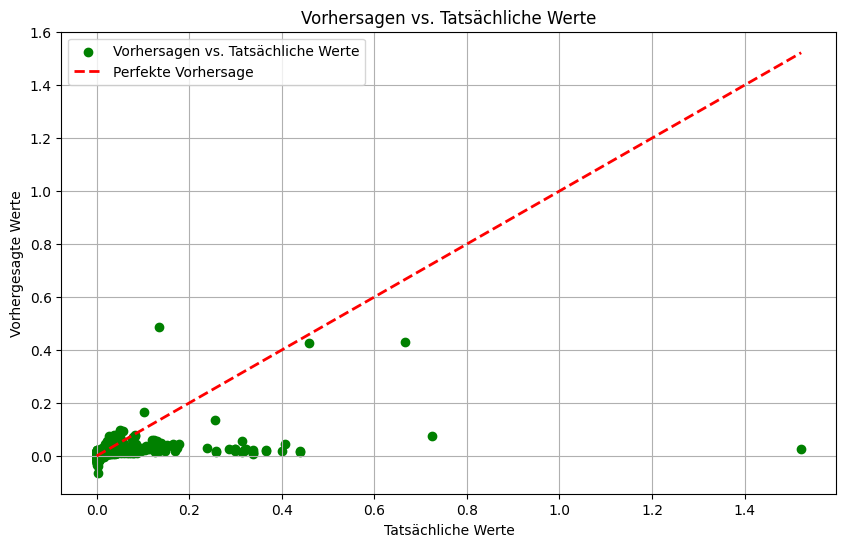

In [22]:
# Visualisierung der Vorhersagen vs. tatsächliche Werte
plt.figure(figsize=(10, 6))

# Scatterplot der tatsächlichen Werte vs. Vorhersagen
plt.scatter(y_test, y_pred, color='green', label='Vorhersagen vs. Tatsächliche Werte')

# Linie für perfekte Vorhersage
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfekte Vorhersage')

# Beschriftungen und Legende
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must be the same size

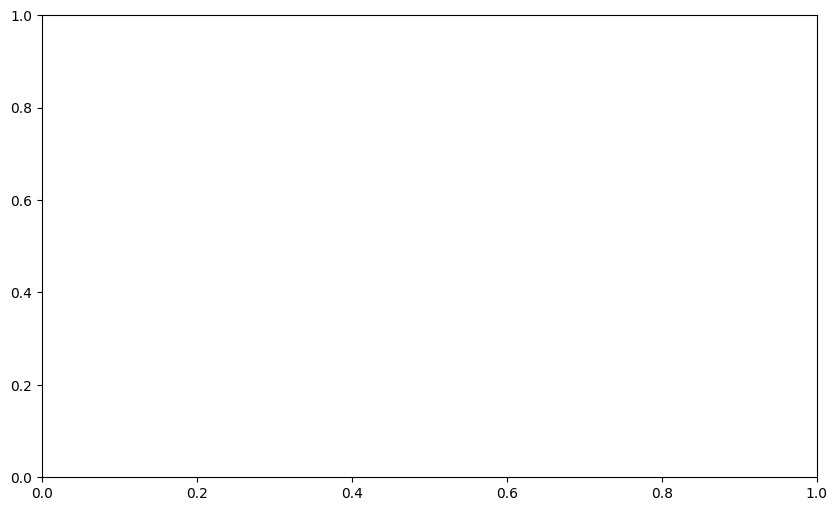

In [21]:
# Residuen berechnen
residuals = y_test - y_pred

# Visualisierung der Residuen
plt.figure(figsize=(10, 6))

# Scatterplot der Residuen
plt.scatter(X_test, residuals, color='purple', label='Residuen')

# Linie für Residuen-Gleichheit
plt.axhline(y=0, color='gray', linestyle='--')

# Beschriftungen und Legende
plt.xlabel('Feature')
plt.ylabel('Residuen')
plt.title('Residuen der linearen Regression')
plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must be the same size

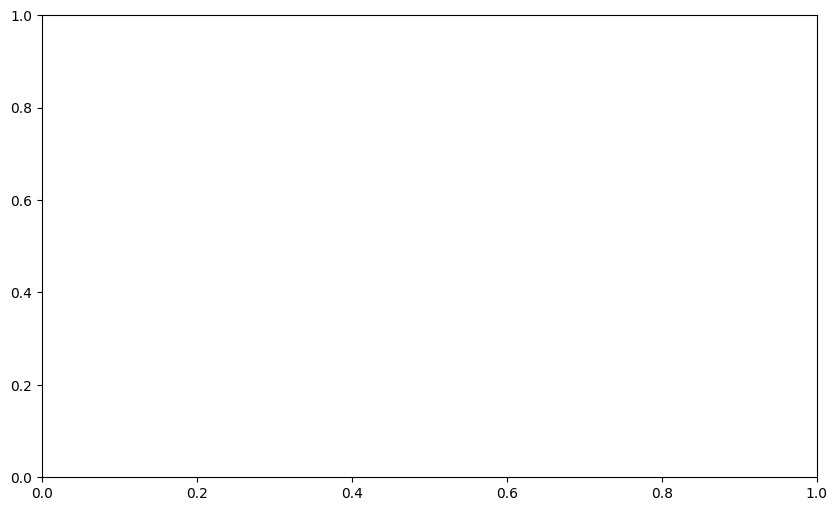

In [18]:


# Visualisierung
plt.figure(figsize=(10, 6))

# Plot der tatsächlichen Datenpunkte
plt.scatter(X, y, color='blue', label='Tatsächliche Daten')

# Plot der Regressionslinie
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regressionslinie')

# Beschriftungen und Legende
plt.xlabel('Feature')
plt.ylabel('Zielvariable')
plt.title('Lineare Regression')
plt.legend()
plt.grid(True)
plt.show()